<a href="https://colab.research.google.com/github/patriciairibarrem/Data-Science---Exercises/blob/main/ML_with_Python_K_Means_Clustering_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Collect the Data
Let's import and preview it:

In [ ]:
import pandas as pd

In [ ]:
customers = pd.read_csv('customerr.csv')

In [ ]:
customers.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


# 2. Explore the Data
Let's get a concise summary of the structure and values within the datase

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
customers.describe(include = 'all').round(2)

,CustomerID,Gender,Age,Income,SpendingScore
count,200.00,200,200.00,200.00,200.00
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.50,NaN,38.85,60560.00,50.20
std,57.88,NaN,13.97,26264.72,25.82
min,1.00,NaN,18.00,15000.00,1.00
25%,50.75,NaN,28.75,41500.00,34.75
50%,100.50,NaN,36.00,61500.00,50.00
75%,150.25,NaN,49.00,78000.00,73.00


Let's try some visual prints

In [ ]:
from matplotlib import pyplot as pyplot
import seaborn as sns
sns.set_theme()

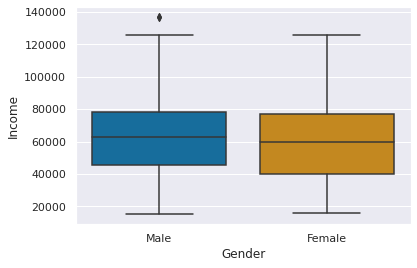

In [ ]:
ax = sns.boxplot(data = customers,
                 x = 'Gender',
                 y = 'Income',
                 palette = 'colorblind')

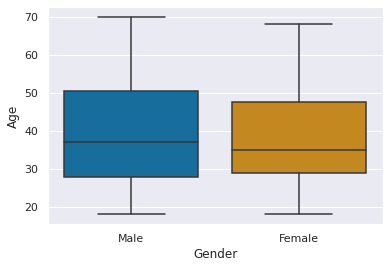

In [ ]:
ax = sns.boxplot(data = customers,
                 x = 'Gender',
                 y = 'Age',
                 palette = 'colorblind')

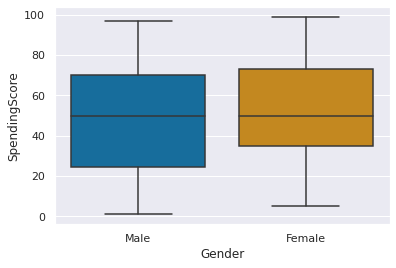

In [ ]:
ax = sns.boxplot(data = customers,
                 x = 'Gender',
                 y = 'SpendingScore',
                 palette = 'colorblind')

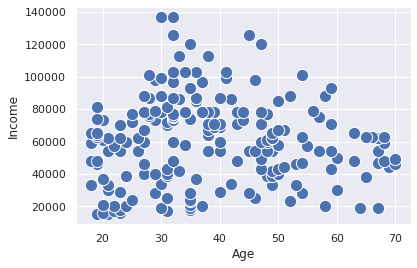

In [ ]:
ax = sns.scatterplot(data = customers,
                 x = 'Age',
                 y = 'Income',
                 s = 150)

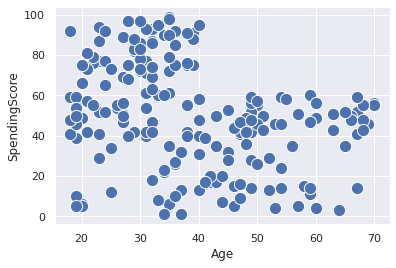

In [ ]:
ax = sns.scatterplot(data = customers,
                 x = 'Age',
                 y = 'SpendingScore',
                 s = 150)

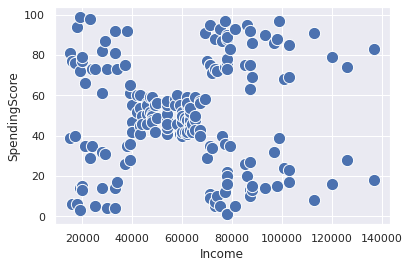

In [ ]:
ax = sns.scatterplot(data = customers,
                 x = 'Income',
                 y = 'SpendingScore',
                 s = 150)

# 3.Prepare the Data

In [ ]:
customers[['Income', 'SpendingScore']].describe().round(2)
#As we can see the std shows a huge difference. we should normalize these data to avoid that income sobressaia ao sepnding score no modelo de k-means.

,Income,SpendingScore
count,200.00,200.00
mean,60560.00,50.20
std,26264.72,25.82
min,15000.00,1.00
25%,41500.00,34.75
50%,61500.00,50.00
75%,78000.00,73.00
max,137000.00,99.00


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
customers_scaled = scaler.fit_transform(customers[['Income', 'SpendingScore']])

In [ ]:
customers_scaled = pd.DataFrame(customers_scaled, columns = ['Income', 'SpendingScore'])

In [ ]:
customers_scaled.describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.74,-1.91
25%,-0.73,-0.60
50%,0.04,-0.01
75%,0.67,0.89
max,2.92,1.89


# 4. Create the Clusters

In [ ]:
from sklearn.cluster import KMeans
#definir argumentos, neste caso, são três
km = KMeans(n_clusters = 3, n_init = 25, random_state=1234)

In [ ]:
#craete cluster assignements
km.fit(customers_scaled)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [ ]:
#numpy array of cluster assignments 
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [ ]:
#total within-cluster sum of squares (WCSS) for the clusters 
km.inertia_

157.7040081503594

# 4.1 Evaluate the Clusters

In [ ]:
#count how many customers are in each clusters
pd.Series(km.labels_).value_counts().sort_index()

0    123
1     38
2     39
dtype: int64

In [ ]:
km.cluster_centers_

array([[-0.62618966, -0.01439238],
       [ 1.00919971, -1.22553537],
       [ 0.99158305,  1.23950275]])

In [ ]:
cluster_centers = pd.DataFrame(km.cluster_centers_,
                               columns = ['Income', 'SpendingScore'])
cluster_centers

,Income,SpendingScore
0,-0.626190,-0.014392
1,1.009200,-1.225535
2,0.991583,1.239503


# 4.2 Visualize the Clusters

In [61]:
from matplotlib import pyplot as plt

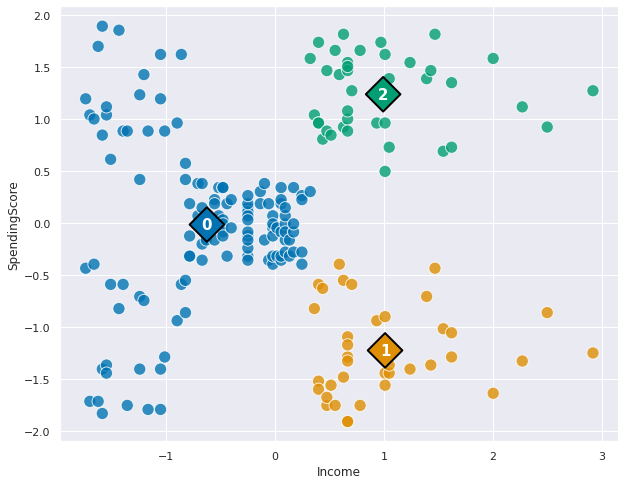

In [63]:
#set the fgirue size
plt.figure(figsize=(10, 8))

#plot clusters
ax = sns.scatterplot(data = customers_scaled,
                     x = 'Income',
                     y = 'SpendingScore',
                     hue = km.labels_,
                     palette = 'colorblind',
                     alpha = 0.8,
                     s = 150,
                     legend = False)

#Plot Centroids
ax = sns.scatterplot(data = cluster_centers,
                     x = 'Income',
                     y = 'SpendingScore',
                     hue = cluster_centers.index,
                     palette = 'colorblind',
                     s = 600,
                     marker = 'D',
                     ec = 'black',
                     legend = False)

#add centroid labels
for i in range(len(cluster_centers)):
              plt.text(x = cluster_centers.Income[i],
              y = cluster_centers.SpendingScore[i],
              s = i, 
              horizontalalignment='center',
              verticalalignment='center',
              size = 15,
              weight = 'bold',
              color = 'white')

# 5. Choose the right Number of Cluster

The Within Clusters Sum of Squares (WCSS)

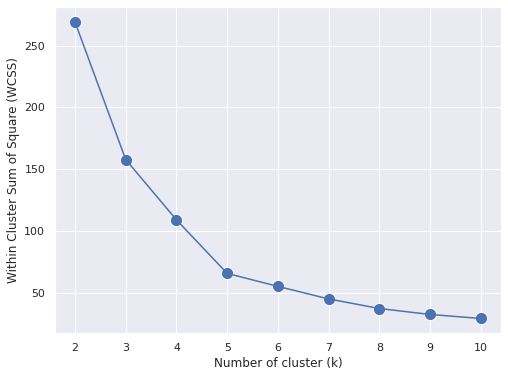

In [68]:
wcss = []
for k in range (2, 11):
  km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
  km.fit(customers_scaled)
  wcss.append(km.inertia_)

wcss_series = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of cluster (k)',
            ylabel = 'Within Cluster Sum of Square (WCSS)')

Avarage Silhouette Score

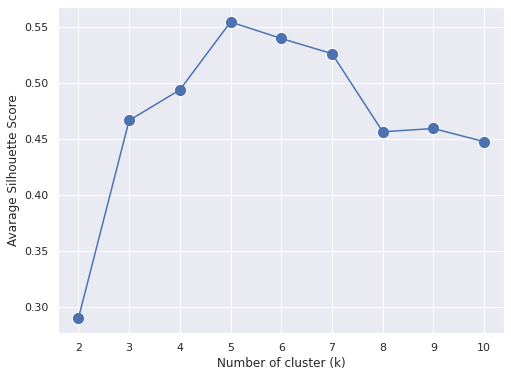

In [70]:
from sklearn.metrics import silhouette_score

silhouette = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
  km.fit(customers_scaled)
  silhouette.append(silhouette_score(customers_scaled, km.labels_))

silhouette_series = pd.Series(silhouette, index = range(2,11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = silhouette_series, x = silhouette_series.index)
ax = sns.scatterplot(y = silhouette_series, x = silhouette_series.index, s = 150)
ax = ax.set(xlabel = 'Number of cluster (k)',
            ylabel = 'Avarage Silhouette Score')

# The Calinski Harabasz Score}




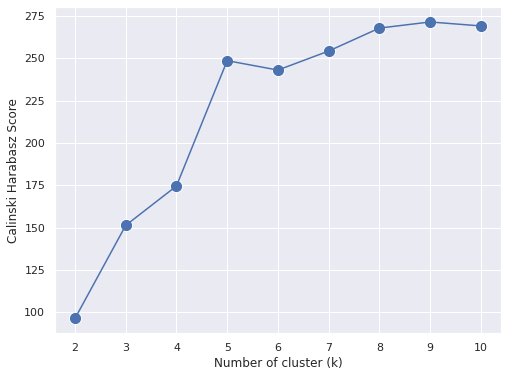

In [71]:
from sklearn.metrics import calinski_harabasz_score

calinski = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
  km.fit(customers_scaled)
  calinski.append(calinski_harabasz_score(customers_scaled, km.labels_))

calinski_series = pd.Series(calinski, index = range(2,11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = calinski_series, x = calinski_series.index)
ax = sns.scatterplot(y = calinski_series, x = calinski_series.index, s = 150)
ax = ax.set(xlabel = 'Number of cluster (k)',
            ylabel = 'Calinski Harabasz Score')

# 6. Analyze and Interpret the Clusters

In [74]:
km = KMeans(n_clusters = 5, n_init = 25, random_state = 1234)
km.fit(customers_scaled)

KMeans(n_clusters=5, n_init=25, random_state=1234)

In [85]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns = ['Income', 'SpendingScore'])

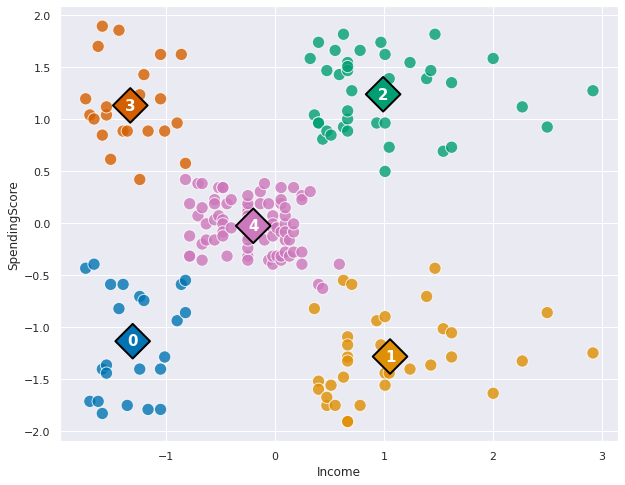

In [87]:
plt.figure(figsize=(10,8))

ax = sns.scatterplot(data = customers_scaled,
                     x = 'Income',
                     y = 'SpendingScore',
                     hue = km.labels_,
                     palette = 'colorblind',
                     alpha = 0.8,
                     s = 150,
                     legend = False)              

ax = sns.scatterplot(data = cluster_centers,
                     x = 'Income',
                     y = 'SpendingScore',
                     hue = cluster_centers.index,
                     palette = 'colorblind',
                     s = 600,
                     marker = 'D',
                     ec = 'black',
                     legend = False)

for i in range (len(cluster_centers)):
  plt.text(x = cluster_centers.Income[i],
           y = cluster_centers.SpendingScore[i],
           s = i,
           horizontalalignment='center',
           verticalalignment='center',
           size = 15,
           weight = 'bold',
           color = 'white')

In [88]:
customers['Clusters'] = km.labels_.tolist()
customers.head(10)

,CustomerID,Gender,Age,Income,SpendingScore,Clusters
0,1,Male,19,15000,39,0
1,2,Male,21,15000,81,3
2,3,Female,20,16000,6,0
3,4,Female,23,16000,77,3
4,5,Female,31,17000,40,0
5,6,Female,22,17000,76,3
6,7,Female,35,18000,6,0
7,8,Female,23,18000,94,3
8,9,Male,64,19000,3,0
9,10,Female,30,19000,72,3


In [89]:
customers = pd.get_dummies(customers, columns = ['Gender'])
customers.head(10)

,CustomerID,Age,Income,SpendingScore,Clusters,Gender_Female,Gender_Male
0,1,19,15000,39,0,0,1
1,2,21,15000,81,3,0,1
2,3,20,16000,6,0,1,0
3,4,23,16000,77,3,1,0
4,5,31,17000,40,0,1,0
5,6,22,17000,76,3,1,0
6,7,35,18000,6,0,1,0
7,8,23,18000,94,3,1,0
8,9,64,19000,3,0,0,1
9,10,30,19000,72,3,1,0


In [98]:
customers.agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'}).round(2)

Gender_Female        0.56
Gender_Male          0.44
Age                 36.00
Income           61500.00
SpendingScore       50.00
dtype: float64

In [100]:
customers.groupby('Clusters').agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'}).round(2)

,Gender_Female,Gender_Male,Age,Income,SpendingScore
Clusters,,,,,
0,0.61,0.39,46.0,25000.0,17.0
1,0.46,0.54,42.0,85000.0,16.0
2,0.54,0.46,32.0,79000.0,83.0
3,0.59,0.41,23.5,24500.0,77.0
4,0.59,0.41,46.0,54000.0,50.0
